# Clustering 실습

In [ ]:
import numpy as np
import time 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

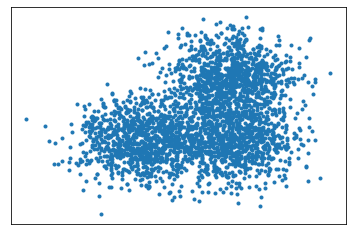

In [ ]:
# Generate sample data
np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]   # 센터 설정
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

plt.scatter(X[:, 0], X[:, 1,], marker='.')
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# Compute clustering with Means
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_labels = k_means.fit(X)
k_means_cluster_centers = k_means.cluster_centers_
# 각 데이터가 속한 클러스터의 중심을 구한다.
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)  

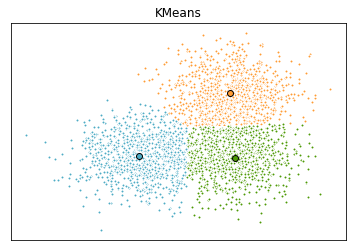

In [ ]:
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for k, col in zip(range(n_clusters), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w', 
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', 
            markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.title('KMeans')
plt.xticks(())
plt.yticks(())
plt.show()

## K-Means 클러스터링 수행 시, 다양하게 발생할 수 있는 문제들

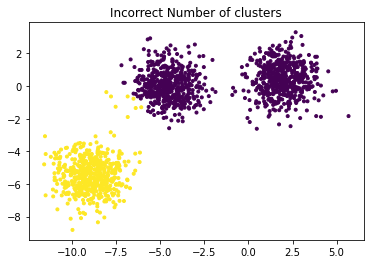

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# 클러스터의 개수가 올바르지 않을 때
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)  # fit와 predict를 동시에

plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='.')
plt.title("Incorrect Number of clusters")
plt.show()

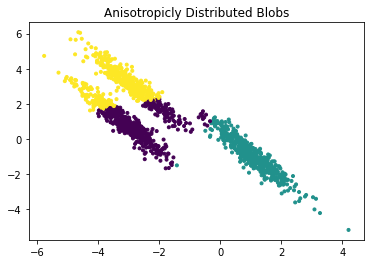

In [ ]:
# 데이터의 분포 형태가 원 형태가 아닐 때
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, marker='.')
plt.title("Anisotropicly Distributed Blobs")
plt.show()

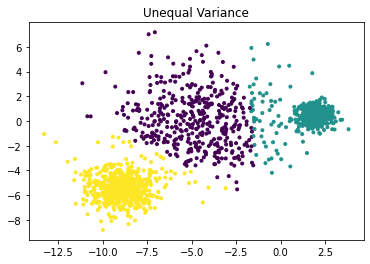

In [ ]:
# 각 데이터가 불균형하게 분산되어 있을 때
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, marker='.')
plt.title("Unequal Variance")
plt.show()

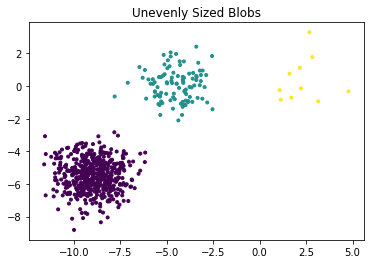

In [ ]:
# 각 클러스터의 크기가 불균형일때
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, marker='.')
plt.title("Unevenly Sized Blobs")
plt.show()

# Word Embedding

In [ ]:
import os       # 파일 접근
import shutil   # 파일 삭제
import tensorflow as tf
import pandas as pd
import csv

from datetime import datetime

In [ ]:
!pip install konlpy
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 35.4MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
--2020-12-28 10:56:54--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  60.7MB/s    in 0.2s    

2020-12-28 10:56:54 (60.7 MB/s) - ‘ratings_train.txt’ saved [1

Twitter Korean Text is an open source Korean tokenizer written in Scala, developed by Will Hohyon Ryu.

In [ ]:
from konlpy.tag import Twitter
twitter = Twitter()

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
# 문장을 형태소 단위로 파싱(parsing) (형태소는 뜻을 가지는 단어의 최소 단위를 의미)
print(twitter.morphs(u'단독입찰보다 복수입찰의 경우'))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']


In [ ]:
# 문장을 명사 단위로 파싱
print(twitter.nouns(u'유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))

['항공기', '체계', '종합', '개발', '경험']


In [ ]:
# 문장을 구 단위로 파싱
print(twitter.phrases(u'날카로운 분석과 신뢰감 있는 진행으로'))

['날카로운 분석', '날카로운 분석과 신뢰감', '날카로운 분석과 신뢰감 있는 진행', '분석', '신뢰', '진행']


In [ ]:
# Tagging 도 함께 진행
print(twitter.pos(u'이것도 되나욬ㅋㅋ'))  # 되나욬

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]


In [ ]:
print(twitter.pos(u'이것도 되나욬ㅋㅋ', norm=True))  # 되나요

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나요', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


In [ ]:
print(twitter.pos(u'이것도 되나욬ㅋㅋ', norm=True, stem=True))  # 되다

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


## Naver 영화 데이터셋


Each file is consisted of three columns: `id`, `document`, `label`

`id`: The review id, provieded by Naver   
`document`: The actual review   
`label`: The sentiment class of the review. (0: negative, 1: positive)  

* 100K negative reviews (originally reviews of ratings 1-4)
* 100K positive reviews (originally reviews of ratings 9-10)


In [ ]:
train_df = pd.read_csv('ratings_train.txt', sep='\t',quoting=csv.QUOTE_NONE)
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
len(train_df.index)  # 총 리뷰 개수

150000

### Preprocessing

In [ ]:
# 주의! 전처리에 약 20분 소요 
processed_corpus = []
for row in train_df['document']:
  try:
    parsed = twitter.pos(row, norm=True, stem=True)
  except:
    print('에러 : "{}" 라는 문장은 처리하지 못했습니다.'.format(row))
  else:
    processed_corpus.append(list(map('/'.join, parsed)))

에러 : "nan" 라는 문장은 처리하지 못했습니다.
에러 : "nan" 라는 문장은 처리하지 못했습니다.
에러 : "nan" 라는 문장은 처리하지 못했습니다.
에러 : "nan" 라는 문장은 처리하지 못했습니다.
에러 : "nan" 라는 문장은 처리하지 못했습니다.


In [ ]:
from pprint import pprint
pprint(processed_corpus[0])

['아/Exclamation',
 '더빙/Noun',
 '../Punctuation',
 '진짜/Noun',
 '짜증나다/Adjective',
 '목소리/Noun']


In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)

In [ ]:
len(dictionary)

49895

In [ ]:
dictionary.token2id

{'../Punctuation': 0,
 '더빙/Noun': 1,
 '목소리/Noun': 2,
 '아/Exclamation': 3,
 '진짜/Noun': 4,
 '짜증나다/Adjective': 5,
 '..../Punctuation': 6,
 '.../Punctuation': 7,
 '가볍다/Adjective': 8,
 '보고/Noun': 9,
 '않다/Verb': 10,
 '연기/Noun': 11,
 '영화/Noun': 12,
 '오버/Noun': 13,
 '조차/Josa': 14,
 '줄/Noun': 15,
 '초딩/Noun': 16,
 '포스터/Noun': 17,
 '흠/Noun': 18,
 '너/Modifier': 19,
 '다/Adverb': 20,
 '다그/Noun': 21,
 '래서/Noun': 22,
 '무재/Noun': 23,
 '밓었/Noun': 24,
 '보다/Verb': 25,
 '추천/Noun': 26,
 '한/Josa': 27,
 '교도소/Noun': 28,
 '구먼/Noun': 29,
 '는/Josa': 30,
 '솔직하다/Adjective': 31,
 '없다/Adjective': 32,
 '이야기/Noun': 33,
 '재미/Noun': 34,
 '조정/Noun': 35,
 '평점/Noun': 36,
 '!/Punctuation': 37,
 '가/Josa': 38,
 '그/Determiner': 39,
 '너무나도/Adverb': 40,
 '늙다/Verb': 41,
 '던스트/Noun': 42,
 '돋보이다/Verb': 43,
 '몬페/Noun': 44,
 '보이다/Verb': 45,
 '사이/Modifier': 46,
 '스파이더맨/Noun': 47,
 '에서/Josa': 48,
 '의/Noun': 49,
 '이쁘다/Adjective': 50,
 '익살스럽다/Adjective': 51,
 '커스틴/Noun': 52,
 '하다/Verb': 53,
 './Punctuation': 54,
 '1/Number': 55,
 '3/Numbe

In [ ]:
import gensim

context = 6
num_workers = 4
embedding_size = 100

# Word2Vec 수행: 기본 옵션은 skip-gram 이다.
model = gensim.models.Word2Vec(sentences=processed_corpus, 
                               window=context, workers = num_workers, 
                               size=embedding_size)

In [ ]:
model.wv.most_similar('엄마/Noun')

[('아빠/Noun', 0.9212626218795776),
 ('딸/Noun', 0.8198063373565674),
 ('아버지/Noun', 0.8100358247756958),
 ('친구/Noun', 0.8004335165023804),
 ('할머니/Noun', 0.7922431230545044),
 ('여자친구/Noun', 0.7830525636672974),
 ('아내/Noun', 0.7774865627288818),
 ('할아버지/Noun', 0.7641680240631104),
 ('동생/Noun', 0.7549131512641907),
 ('아들/Noun', 0.7501407265663147)]

In [ ]:
model.wv.most_similar('ㅎㅎ/KoreanParticle')

[('ㅎ/KoreanParticle', 0.8557173609733582),
 ('ㅎㅎㅎ/KoreanParticle', 0.8451945781707764),
 ('~^^/Punctuation', 0.8141220211982727),
 ('^^/Punctuation', 0.7944117784500122),
 ('♥♥/Foreign', 0.7542731165885925),
 ('...^^/Punctuation', 0.7504699230194092),
 ('..^^/Punctuation', 0.7207622528076172),
 ('염/Noun', 0.7172106504440308),
 ('~~^^/Punctuation', 0.7165040969848633),
 ('♡/Foreign', 0.7130569219589233)]

In [ ]:
model.wv.most_similar(positive=['엄마/Noun', '남자/Noun'],negative=['여자/Noun'])

[('아빠/Noun', 0.8559369444847107),
 ('아버지/Noun', 0.7914802432060242),
 ('아내/Noun', 0.7540013790130615),
 ('딸/Noun', 0.7421691417694092),
 ('친구/Noun', 0.7399884462356567),
 ('할머니/Noun', 0.7379697561264038),
 ('여자친구/Noun', 0.7308481931686401),
 ('할아버지/Noun', 0.7277345657348633),
 ('동생/Noun', 0.7098658084869385),
 ('어머니/Noun', 0.6975387334823608)]

In [ ]:
# Embedding Projector에서 시각화를 위해 저장
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('naver_word2vec')
!python -m gensim.scripts.word2vec2tensor --input naver_word2vec --output naver_w2v

2020-12-28 11:05:38,901 - word2vec2tensor - INFO - running /usr/local/lib/python3.6/dist-packages/gensim/scripts/word2vec2tensor.py --input naver_word2vec --output naver_w2v
2020-12-28 11:05:38,901 - utils_any2vec - INFO - loading projection weights from naver_word2vec
2020-12-28 11:05:40,354 - utils_any2vec - INFO - loaded (15409, 100) matrix from naver_word2vec
2020-12-28 11:05:41,558 - word2vec2tensor - INFO - 2D tensor file saved to naver_w2v_tensor.tsv
2020-12-28 11:05:41,559 - word2vec2tensor - INFO - Tensor metadata file saved to naver_w2v_metadata.tsv
2020-12-28 11:05:41,561 - word2vec2tensor - INFO - finished running word2vec2tensor.py


http://projector.tensorflow.org/

이제 위의 Embedding Projector 사이트로 들어가서, 왼쪽에 존재하는 load 버튼을 클릭하고, 위에는 tensor.tsv파일과 아래에는 metadata.tsv파일을 로드합니다.